In [1]:
import os
import numpy as np
from natsort import natsorted
import matplotlib.pyplot as plt
import re
import pandas as pd

In [2]:
# 153 884    измеряемый диапазон. 0-2136 диапазон данных
start = 400  # нм
end = 700  # нм
step = (884 - 153) / 2134


def nm_to_x(nm):
    return round((nm - start) / step)


# номера точек в массиве по координате х
start_point = round((start - 153) / step)
end_point = start_point + int((end - start) / step)
lamp_point = nm_to_x(565)
mean_point = nm_to_x(650)
min_point = nm_to_x(420)

x = np.arange(start + step, end, step)

In [3]:
def get_rmr(spec):
    y = []
    spec = re.split(",", spec)
    y = list(map(float, spec[start_point + 11 : end_point + 11]))
    return y


def get_txt(spec):
    y = []
    spec = re.split("\n|\t", spec)
    for j in range(start_point, end_point):
        y.append(spec[j * 2 + 15].replace(",", "."))
    return y


def get_csv(spec):
    y = []
    spec = re.split("\n|,", spec)
    for j in range(start_point, end_point):
        y.append(spec[j * 2 + 1].replace(",", "."))
    return y

In [4]:
def get_data(path):
    """получение всей папки в виде списка с массивами np"""
    _file_list = np.array(natsorted(os.listdir(path)))
    _data = []
    for file in range(len(_file_list)):
        with open(path + _file_list[file], "r", encoding="utf8") as spec:
            spec = spec.read()
        spec = re.split(",", spec)
        _data.append(np.array(spec[start_point + 11 : end_point + 11],dtype=float))
    #    _data.append(get_rmr(spec))
    return _data

In [7]:
# получение всех спектров в виде списка в котором
# каждая строка - папка, а каждый элемент - массив np с спектром
data = []

main_folder = r"C:\Users\Nik\Desktop\prog\только rmr"
main_folder = main_folder.replace(chr(92), "/")
folders_list = np.array(natsorted(os.listdir(main_folder)))
print(main_folder)
print(folders_list)

for i in range(len(folders_list)):
    data.append(get_data(main_folder + "/" + folders_list[i] + "/"))

C:/Users/Nik/Desktop/prog/только rmr
['15' '16' '17' '18' '19' '20' '25' '26' '27' '28' '29' '30' '31']


368


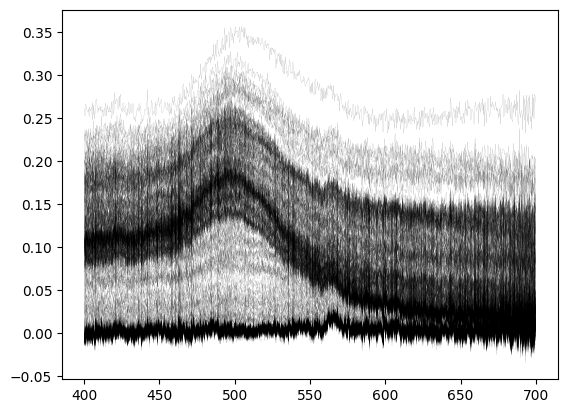

In [11]:
# просто посмотреть график в какойто папке
# ['15' '16' '17' '18' '19' '20' '25' '26' '27' '28' '29' '30' '31']
#  0    1    2    3    4    5    6    7    8    9    10   11   12
n =0 
for i in range(len(data[n])):
    plt.plot(x, data[n][i], lw=0.05, color="black")
print(len(data[n]))